![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".

Se os elementos que não estejam nas diagonais principais são zero, na execução do algoritmo ele estará no fator ou estará zerando toda uma equação, fazendo um metodo parecido ao de Gauss-Jordan.

Dê um exemplo de uma matriz $4 \times 4$, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes a estes zeros.

$$\begin{bmatrix} a_{11} & 0 & 0 & a_{14} \\ a_{21} & 0 & a_{23} & a_{24} \\ a_{31} & a_{32} & 0 & 0 \\ 0 & a_{42} & 0 & a_{43}   \end{bmatrix}$$

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [2]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    for k in range(0,n-1):        
        fator = -(A[k+1][k]/A[k][k])
        b[k+1] = b[k+1] + fator*b[k]
        A[k+1][k] = 0
        A[k+1][k+1] = A[k+1][k+1] + fator*A[k][k+1] 
    xs = []
    xs.append(b[m-1]/A[n-1][m-1])
    for i in range(m-1,0,-1):
        xs.append((b[i-1] - A[i-1][i]*xs[-1])/A[i-1][i-1])
    return xs[::-1]

Qual o papel do primeiro assert?

Garantir que a quantidade de colunas da matriz A é igual ao tamanho do vetor b

In [3]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [4]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

Como a função retorna um vetor de tamanho m, podemos fazer o produto desse vetor pela matriz resultante da função e o resultado precisa ser igual a Matriz original.

In [5]:
# Exemplo de teste
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
B = [1,1,1]
def teste(A,B):
    n,m = np.shape(A)
    x1 = tridiag_solve(A, B)
    for l in range(m):
        sum = 0
        for i in range(n):
            sum += A[l][i]*x1[i]
        if sum == B[l]:
            pass
        else:
            return "função não funciona"
    return "função funciona"
assert teste(A,B)=="função funciona"

In [6]:
np.random.seed(9)
A = np.random.randn(5,5)
b = [1,2,3,4,5]


x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert not np.allclose(x1, x2, atol=1e-3, rtol=1e-3)

Explique o resultado dos testes acima.

Nossa função só funciona para Matrizes tridiagonais.

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: a caixa abaixo pode usar algo como 500M de RAM, por conta das matrizes 4k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{12}$.
Se você não conseguir fazer funcionar até $2^{12}$,
reduza o maior valor do `logspace`, mas não reduza demais.

Obs2: A caixa abaixo deve ser executada em menos de 60 segundos, para não dar `TimeOut`.

In [7]:
%%time

ns = np.logspace(4,12, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start = time()
    dig = np.full(n-1, -1)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=1) + np.diag(dig[::-1], k=-1)
    b = np.random.randn(n)
    finish = time()
    t_create.append(finish-start)
    start = time()
    x = tridiag_solve(A,b)
    finish = time()
    t_solve.append(finish-start)

CPU times: total: 1.23 s
Wall time: 1.25 s


Agora, faça um gráfico destes tempos, em função de $n$.

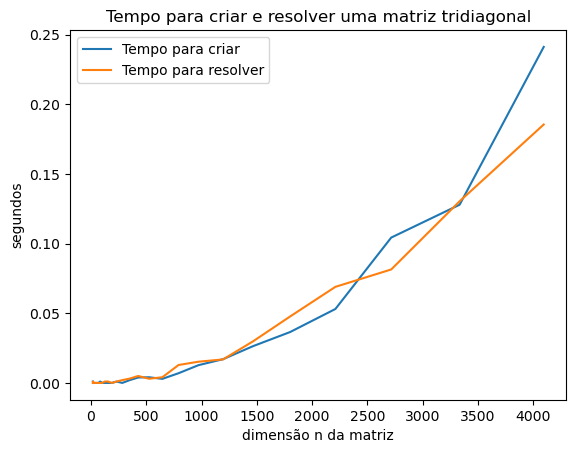

In [8]:
plt.plot(ns, t_create, label="Tempo para criar")
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz tridiagonal")
ax = plt.gca()

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [10]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert 2**9 <= max(xs) <= 2**13

In [11]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

A criação da matriz, por que precisamos criar a matriz completa, ou seja, embora o computador crie rapidamente a matriz diagonal, ele precisar adicionar 0 em todos os outros elementos da matriz, e com isso nossa função tem ainda menos trabalho para fazer, já que n precisa ficar zerando colunas.

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

Text(0.5, 1.0, 'Tempo para criar e resolver uma matriz tridiagonal')

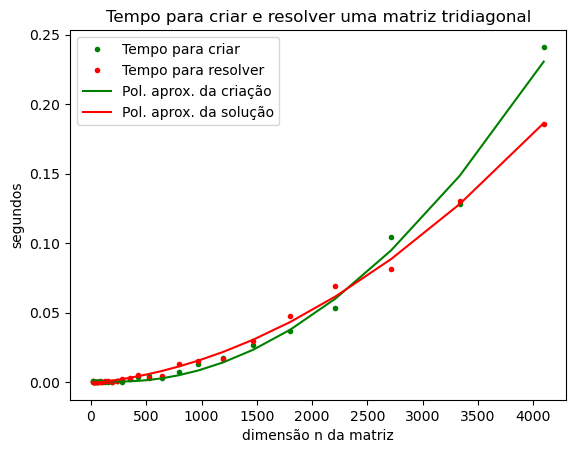

In [12]:
plt.plot(ns, t_create,"g.", label="Tempo para criar")
plt.plot(ns, t_solve,"r.", label="Tempo para resolver")
y_create = np.polyfit(ns,t_create, 2)
plt.plot(ns, np.polyval(y_create, ns),"g",label="Pol. aprox. da criação")
y_solve = np.polyfit(ns,t_solve, 2)
plt.plot(ns, np.polyval(y_solve, ns),"r",label="Pol. aprox. da solução")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz tridiagonal")

Comente

Podemos observar que a função é sempre crescente e aparentemente é uma curva de uma função quadrática por isso com ajuda da função polyfit do numpy que calcula o coeficiente do polinomio através do método dos minímos quadrados cheguei na "melhor" aproximação pra essas duas funções, com elas sendo minimamente diferentes.

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [13]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    max_column = np.where(A[0]!=0)[0][-1]
    zeros = m - 1 - max_column
    for k in range(0,n-1): 
        for linha in range(k+1, m-zeros):    
            fator = -(A[linha][k]/A[k][k])      
            b[linha] = b[linha] + fator*b[k]
            A[linha][k] = 0
            for coluna in range(k+1,m-zeros):
                A[linha][coluna] = A[linha][coluna] + fator*A[k][coluna] 
        zeros = zeros - 1 if zeros > 0 else 0
    xs = list(np.zeros(m))
    xs[m-1] = b[m-1]/A[m-1][m-1]
    for linha in range(m-2,-1,-1):
        n = b[linha]
        d = A[linha][linha]
        col_max = np.where(A[linha] != 0)[0][-1]
        for i in range(linha+1, col_max+1):
            n -= A[linha][i]*xs[i]
        xs[linha] = n/d
    return xs

In [14]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

In [15]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

In [17]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,0,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

AssertionError: 

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{12}$.

In [18]:
ns = np.logspace(4,12, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    start = time()
    dig = np.full(n-2, -5)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=2) + np.diag(dig[::-1], k=-2)
    b = np.random.randn(n)
    finish = time()
    t_create.append(finish-start)
    start = time()
    x = pentadiag_solve(A,b)
    finish = time()
    t_solve.append(finish-start)

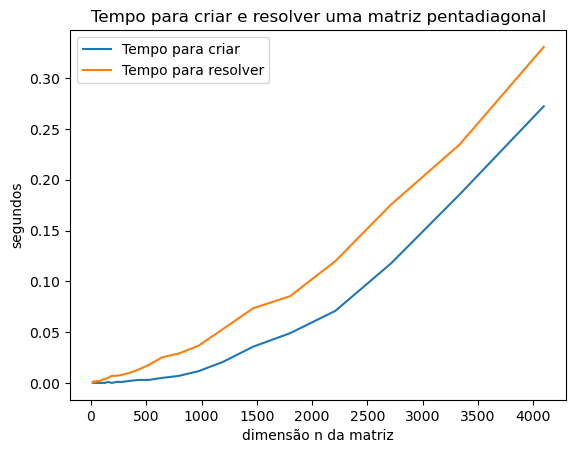

In [19]:
plt.plot(ns, t_create, label="Tempo para criar")
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Tempo para criar e resolver uma matriz pentadiagonal")
ax = plt.gca()

In [20]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

O que mudou?

Agora o tempo para resolver o sistema é maior do que o tempo de criação, já que a função possui mais termos de cada coluna para analisar.

## Questão 4: Velocidade

Seu método tridiagonal é mais rápido do que `np.linalg.solve` para matrizes $10 \times 10$?
Para qual $n$, aproximadamente, seu método fica mais rápido?

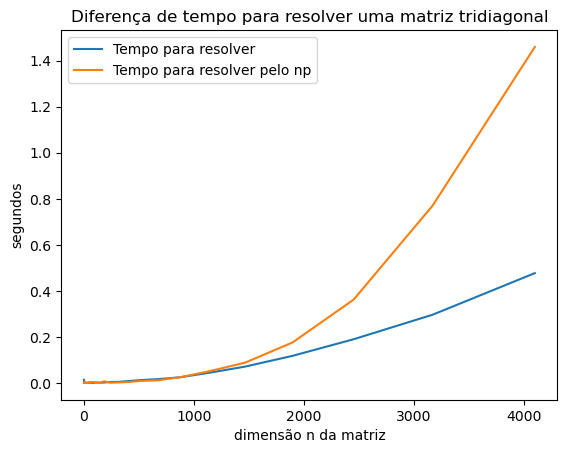

In [21]:
ns = np.logspace(2,12, base=2, num=28, dtype=int)
t_solve  = []
t_solve_np  = []
for i, n in enumerate(ns):
    start = time()
    dig = np.full(n-1, -1)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=1) + np.diag(dig[::-1], k=-1)
    b = np.random.randn(n)
    x = tridiag_solve(A,b)
    finish = time()
    t_solve.append(finish-start)
    start = time()
    x = np.linalg.solve(A,b)
    finish = time()
    t_solve_np.append(finish-start)
plt.plot(ns, t_solve, label="Tempo para resolver")
plt.plot(ns,t_solve_np, label="Tempo para resolver pelo np")
plt.ylabel('segundos')
plt.xlabel('dimensão n da matriz')
plt.legend()
plt.title("Diferença de tempo para resolver uma matriz tridiagonal")
ax = plt.gca()

E como é a qualidade da solução?
Faça cálculos na caixa abaixo, e comente em seguida.

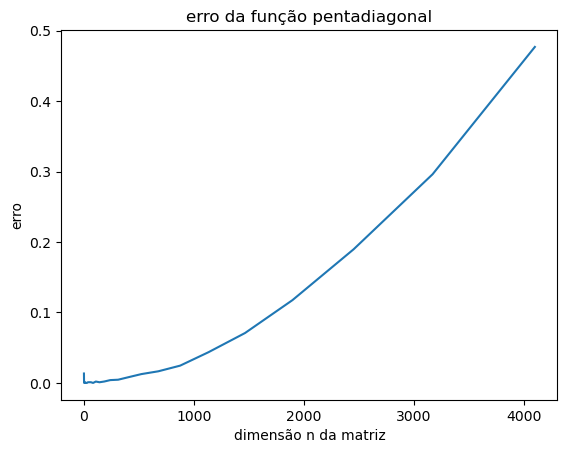

In [22]:
ns = np.logspace(2,12, base=2, num=28, dtype=int)
Err= []
for i, n in enumerate(ns):
    dig = np.full(n-1, -1)
    A = np.diag(np.random.randint(1,100, n)) + np.diag(dig, k=1) + np.diag(dig[::-1], k=-1)
    b = np.random.randn(n)
    x = tridiag_solve(A,b)
    y = np.linalg.solve(A,b)
    Err.append(np.max(np.abs(x-y)))
plt.plot(ns, t_solve)
plt.ylabel('erro')
plt.xlabel('dimensão n da matriz')
plt.title("erro da função pentadiagonal")
ax = plt.gca()

O metodo fica mais rapido quando a matriz é maior que 1000 x 1000, porém o erro também aumenta devido ao aumento da dimensão da matriz.